## Import libraries

In [1]:
#!pip3 -q install cython
#!pip3 -q install git+https://github.com/coreylynch/pyFM
#!pip3 -q install catboost

In [2]:
from recsys_data_preprocessing import *
from model import *
from prepare_data import *
from metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Download the dataset

In [3]:
rec = RecSysData(("./data/interactions.csv"))

In [4]:
interactions_df = rec.get_interactions_and_users_data(['./data/user_age.csv', './data/user_region.csv'])

In [5]:
item_info_df = rec.get_items_data(['./data/item_asset.csv', './data/item_price.csv', './data/item_subclass.csv'])

In [6]:
interactions_df

,personId,contentId,result,one-hot feature number of the region,feature_of_the_region,age
0,0,3568,1.0,6.0,1.0,NaN
1,0,3568,1.0,0.0,1.0,NaN
2,0,3827,1.0,6.0,1.0,NaN
3,0,3827,1.0,0.0,1.0,NaN
4,0,4844,1.0,6.0,1.0,NaN
...,...,...,...,...,...,...
401452,30910,18176,1.0,0.0,1.0,NaN
401453,30910,18185,1.0,0.0,1.0,NaN
401454,30910,18248,1.0,0.0,1.0,NaN
401455,30910,18349,1.0,0.0,1.0,NaN


In [7]:
item_info_df

,contentId,characteristic value,price,category number,sign of relation to the category
0,0,0.009497,0.012911,679,1.0
1,1,0.004226,0.005211,1376,1.0
2,2,0.003371,0.004131,1495,1.0
3,3,0.002991,0.003521,502,1.0
4,4,0.002991,0.003521,502,1.0
...,...,...,...,...,...
18490,15387,NaN,0.002019,3,1.0
18491,15388,NaN,0.002113,3,1.0
18492,15389,NaN,0.002113,3,1.0
18493,15390,NaN,0.002113,3,1.0


## Reduce the amount of data 

In [8]:
interactions_full_df = collapse_all_actions_with_one_product_into_one_interaction(interactions_df, 50)

## Split data into training and testing 

In [9]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['personId'], 
                                   test_size=0.2,
                                   random_state=42)

## Prepare data for convenient measuring quality

In [10]:
interactions = prepare_data_for_convenient_measuring_quality(interactions_train_df, interactions_test_df)

In [11]:
scores = []

## Baseline (model by popularity)

In [12]:
baseline = Baseline(interactions)
baseline.fit(interactions_train_df)
baseline.predict()
scores.append(calc_metrics('prediction_popular', interactions))
print(calc_metrics('prediction_popular', interactions))

0.02953795379537966


## SVD model

In [13]:
svd_model = SVDModel(interactions)
svd_model.fit(interactions_train_df)
svd_model.predict()
scores.append(calc_metrics('prediction_svd', interactions))
print(calc_metrics('prediction_svd', interactions))

  0%|          | 0/1212 [00:00<?, ?it/s]

0.03638613861386162


## Collaborative Filtering mode

In [14]:
collaborative = CollaborativeFilteringModel(interactions)
collaborative.fit(interactions_train_df)
collaborative.predict()
scores.append(calc_metrics('prediction_user_based', interactions))
print(calc_metrics('prediction_user_based', interactions))

  0%|          | 0/1211 [00:00<?, ?it/s]

  0%|          | 0/1212 [00:00<?, ?it/s]

0.0016501650165016506


## Content-Based Filtering model

In [15]:
X_train, y_train, test = prepare_data_for_content_based_recommender(interactions, interactions_train_df, item_info_df)
contentrecsys = ContentBasedRecommender(interactions)
contentrecsys.fit(X_train, y_train)
contentrecsys.predict(test)
scores.append(calc_metrics('prediction_content', interactions))
print(calc_metrics('prediction_content', interactions))

Learning rate set to 0.106878
0:	learn: 0.9922672	total: 97.9ms	remaining: 1m 37s
1:	learn: 0.9110466	total: 123ms	remaining: 1m 1s
2:	learn: 0.8472926	total: 150ms	remaining: 49.9s
3:	learn: 0.7957681	total: 177ms	remaining: 44.1s
4:	learn: 0.7534292	total: 206ms	remaining: 40.9s
5:	learn: 0.7180617	total: 233ms	remaining: 38.6s
6:	learn: 0.6884316	total: 260ms	remaining: 36.9s
7:	learn: 0.6633607	total: 286ms	remaining: 35.5s
8:	learn: 0.6415331	total: 313ms	remaining: 34.5s
9:	learn: 0.6230672	total: 339ms	remaining: 33.6s
10:	learn: 0.6070116	total: 366ms	remaining: 32.9s
11:	learn: 0.5926912	total: 393ms	remaining: 32.3s
12:	learn: 0.5803331	total: 422ms	remaining: 32s
13:	learn: 0.5695912	total: 447ms	remaining: 31.5s
14:	learn: 0.5599779	total: 474ms	remaining: 31.1s
15:	learn: 0.5515879	total: 501ms	remaining: 30.8s
16:	learn: 0.5443512	total: 527ms	remaining: 30.5s
17:	learn: 0.5378177	total: 553ms	remaining: 30.2s
18:	learn: 0.5321514	total: 579ms	remaining: 29.9s
19:	learn: 

161:	learn: 0.4612533	total: 4.52s	remaining: 23.4s
162:	learn: 0.4611879	total: 4.55s	remaining: 23.3s
163:	learn: 0.4610956	total: 4.58s	remaining: 23.3s
164:	learn: 0.4609777	total: 4.6s	remaining: 23.3s
165:	learn: 0.4608468	total: 4.63s	remaining: 23.3s
166:	learn: 0.4607728	total: 4.65s	remaining: 23.2s
167:	learn: 0.4606657	total: 4.68s	remaining: 23.2s
168:	learn: 0.4605462	total: 4.71s	remaining: 23.2s
169:	learn: 0.4605138	total: 4.74s	remaining: 23.2s
170:	learn: 0.4604275	total: 4.77s	remaining: 23.1s
171:	learn: 0.4603753	total: 4.8s	remaining: 23.1s
172:	learn: 0.4602698	total: 4.82s	remaining: 23.1s
173:	learn: 0.4601388	total: 4.85s	remaining: 23s
174:	learn: 0.4600106	total: 4.88s	remaining: 23s
175:	learn: 0.4599679	total: 4.9s	remaining: 23s
176:	learn: 0.4598490	total: 4.93s	remaining: 22.9s
177:	learn: 0.4597462	total: 4.96s	remaining: 22.9s
178:	learn: 0.4596676	total: 4.98s	remaining: 22.9s
179:	learn: 0.4596205	total: 5.01s	remaining: 22.8s
180:	learn: 0.4595150

321:	learn: 0.4503484	total: 8.76s	remaining: 18.4s
322:	learn: 0.4502982	total: 8.79s	remaining: 18.4s
323:	learn: 0.4502455	total: 8.82s	remaining: 18.4s
324:	learn: 0.4502044	total: 8.85s	remaining: 18.4s
325:	learn: 0.4501577	total: 8.87s	remaining: 18.3s
326:	learn: 0.4500533	total: 8.9s	remaining: 18.3s
327:	learn: 0.4499946	total: 8.93s	remaining: 18.3s
328:	learn: 0.4499240	total: 8.95s	remaining: 18.3s
329:	learn: 0.4499006	total: 8.98s	remaining: 18.2s
330:	learn: 0.4498233	total: 9s	remaining: 18.2s
331:	learn: 0.4497713	total: 9.03s	remaining: 18.2s
332:	learn: 0.4497395	total: 9.06s	remaining: 18.1s
333:	learn: 0.4496886	total: 9.08s	remaining: 18.1s
334:	learn: 0.4496612	total: 9.11s	remaining: 18.1s
335:	learn: 0.4496400	total: 9.13s	remaining: 18s
336:	learn: 0.4496088	total: 9.16s	remaining: 18s
337:	learn: 0.4495845	total: 9.18s	remaining: 18s
338:	learn: 0.4495341	total: 9.21s	remaining: 18s
339:	learn: 0.4494849	total: 9.23s	remaining: 17.9s
340:	learn: 0.4494325	to

484:	learn: 0.4438773	total: 13.3s	remaining: 14.1s
485:	learn: 0.4438457	total: 13.3s	remaining: 14.1s
486:	learn: 0.4438018	total: 13.4s	remaining: 14.1s
487:	learn: 0.4437680	total: 13.4s	remaining: 14.1s
488:	learn: 0.4437410	total: 13.4s	remaining: 14s
489:	learn: 0.4437261	total: 13.5s	remaining: 14s
490:	learn: 0.4436777	total: 13.5s	remaining: 14s
491:	learn: 0.4436484	total: 13.5s	remaining: 14s
492:	learn: 0.4435852	total: 13.5s	remaining: 13.9s
493:	learn: 0.4435462	total: 13.6s	remaining: 13.9s
494:	learn: 0.4435244	total: 13.6s	remaining: 13.9s
495:	learn: 0.4435001	total: 13.6s	remaining: 13.8s
496:	learn: 0.4434791	total: 13.6s	remaining: 13.8s
497:	learn: 0.4434656	total: 13.7s	remaining: 13.8s
498:	learn: 0.4434490	total: 13.7s	remaining: 13.8s
499:	learn: 0.4434201	total: 13.7s	remaining: 13.7s
500:	learn: 0.4433908	total: 13.8s	remaining: 13.7s
501:	learn: 0.4433426	total: 13.8s	remaining: 13.7s
502:	learn: 0.4433013	total: 13.8s	remaining: 13.6s
503:	learn: 0.443277

643:	learn: 0.4394193	total: 17.6s	remaining: 9.73s
644:	learn: 0.4394117	total: 17.6s	remaining: 9.7s
645:	learn: 0.4393818	total: 17.7s	remaining: 9.68s
646:	learn: 0.4393656	total: 17.7s	remaining: 9.65s
647:	learn: 0.4393351	total: 17.7s	remaining: 9.62s
648:	learn: 0.4393060	total: 17.7s	remaining: 9.59s
649:	learn: 0.4392924	total: 17.8s	remaining: 9.56s
650:	learn: 0.4392544	total: 17.8s	remaining: 9.54s
651:	learn: 0.4392015	total: 17.8s	remaining: 9.51s
652:	learn: 0.4391774	total: 17.8s	remaining: 9.48s
653:	learn: 0.4391540	total: 17.9s	remaining: 9.46s
654:	learn: 0.4391368	total: 17.9s	remaining: 9.43s
655:	learn: 0.4391202	total: 17.9s	remaining: 9.4s
656:	learn: 0.4390991	total: 18s	remaining: 9.37s
657:	learn: 0.4390893	total: 18s	remaining: 9.34s
658:	learn: 0.4390785	total: 18s	remaining: 9.32s
659:	learn: 0.4390596	total: 18s	remaining: 9.29s
660:	learn: 0.4390347	total: 18.1s	remaining: 9.26s
661:	learn: 0.4390108	total: 18.1s	remaining: 9.23s
662:	learn: 0.4389840	

803:	learn: 0.4357284	total: 22s	remaining: 5.35s
804:	learn: 0.4357085	total: 22s	remaining: 5.32s
805:	learn: 0.4356918	total: 22s	remaining: 5.3s
806:	learn: 0.4356687	total: 22s	remaining: 5.27s
807:	learn: 0.4356493	total: 22.1s	remaining: 5.24s
808:	learn: 0.4356397	total: 22.1s	remaining: 5.21s
809:	learn: 0.4356200	total: 22.1s	remaining: 5.19s
810:	learn: 0.4356029	total: 22.1s	remaining: 5.16s
811:	learn: 0.4355727	total: 22.2s	remaining: 5.13s
812:	learn: 0.4355509	total: 22.2s	remaining: 5.11s
813:	learn: 0.4355117	total: 22.2s	remaining: 5.08s
814:	learn: 0.4354832	total: 22.3s	remaining: 5.05s
815:	learn: 0.4354691	total: 22.3s	remaining: 5.02s
816:	learn: 0.4354456	total: 22.3s	remaining: 5s
817:	learn: 0.4354181	total: 22.3s	remaining: 4.97s
818:	learn: 0.4353949	total: 22.4s	remaining: 4.94s
819:	learn: 0.4353866	total: 22.4s	remaining: 4.91s
820:	learn: 0.4353811	total: 22.4s	remaining: 4.89s
821:	learn: 0.4353708	total: 22.4s	remaining: 4.86s
822:	learn: 0.4353337	to

969:	learn: 0.4325874	total: 26.6s	remaining: 822ms
970:	learn: 0.4325610	total: 26.6s	remaining: 795ms
971:	learn: 0.4325585	total: 26.6s	remaining: 767ms
972:	learn: 0.4325349	total: 26.7s	remaining: 740ms
973:	learn: 0.4325183	total: 26.7s	remaining: 713ms
974:	learn: 0.4325105	total: 26.7s	remaining: 685ms
975:	learn: 0.4325068	total: 26.8s	remaining: 658ms
976:	learn: 0.4324825	total: 26.8s	remaining: 631ms
977:	learn: 0.4324479	total: 26.8s	remaining: 603ms
978:	learn: 0.4324312	total: 26.8s	remaining: 576ms
979:	learn: 0.4324214	total: 26.9s	remaining: 548ms
980:	learn: 0.4323940	total: 26.9s	remaining: 521ms
981:	learn: 0.4323688	total: 26.9s	remaining: 494ms
982:	learn: 0.4323541	total: 26.9s	remaining: 466ms
983:	learn: 0.4323379	total: 27s	remaining: 439ms
984:	learn: 0.4323286	total: 27s	remaining: 411ms
985:	learn: 0.4323056	total: 27s	remaining: 384ms
986:	learn: 0.4322913	total: 27.1s	remaining: 356ms
987:	learn: 0.4322586	total: 27.1s	remaining: 329ms
988:	learn: 0.4322

  0%|          | 0/1212 [00:00<?, ?it/s]

0.01955445544554459


## Factorization Machine

In [16]:
train_features, test_features, y_train = prepare_data_for_factorization_machines(interactions_train_df, 
                                                                                 interactions)
factorization = FactorizationMachines(interactions)
factorization.fit(train_features, y_train,interactions_train_df)
factorization.predict(test_features)
scores.append(calc_metrics('fm_prediction', interactions))
print(calc_metrics('fm_prediction', interactions))

  0%|          | 0/72634 [00:00<?, ?it/s]

  0%|          | 0/1212 [00:00<?, ?it/s]

Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.10874
-- Epoch 2
Training MSE: 0.09391
-- Epoch 3
Training MSE: 0.08891
-- Epoch 4
Training MSE: 0.08651
-- Epoch 5
Training MSE: 0.08525
-- Epoch 6
Training MSE: 0.08467
-- Epoch 7
Training MSE: 0.08441
-- Epoch 8
Training MSE: 0.08408
-- Epoch 9
Training MSE: 0.08379
-- Epoch 10
Training MSE: 0.08365
-- Epoch 11
Training MSE: 0.08336
-- Epoch 12
Training MSE: 0.08314
-- Epoch 13
Training MSE: 0.08299
-- Epoch 14
Training MSE: 0.08279
-- Epoch 15
Training MSE: 0.08274
-- Epoch 16
Training MSE: 0.08272
-- Epoch 17
Training MSE: 0.08277
-- Epoch 18
Training MSE: 0.08272
-- Epoch 19
Training MSE: 0.08283
-- Epoch 20
Training MSE: 0.08289
-- Epoch 21
Training MSE: 0.08291
-- Epoch 22
Training MSE: 0.08296
-- Epoch 23
Training MSE: 0.08289
-- Epoch 24
Training MSE: 0.08278
-- Epoch 25
Training MSE: 0.08275
-- Epoch 26
Training MSE: 0.08275
-- Epoch 27
Training MSE: 0.08269
-- Epoch 28
Tra

## Comparing the methods

In [17]:
scores = ["%.3f" % x for x in scores]
global_metrics_df = pd.DataFrame({'ModelName': ['Baseline', "SVDModel",  "CollaborativeFilteringModel", 
                                                  "ContentBasedRecommender", "FactorizationMachines"],
                     'Score': scores
                    }).set_index("ModelName")
global_metrics_df["Score"] = global_metrics_df["Score"].astype(float)

In [18]:
global_metrics_df

,Score
ModelName,
Baseline,0.030
SVDModel,0.036
CollaborativeFilteringModel,0.002
ContentBasedRecommender,0.020
FactorizationMachines,0.022


## Plot Comparison

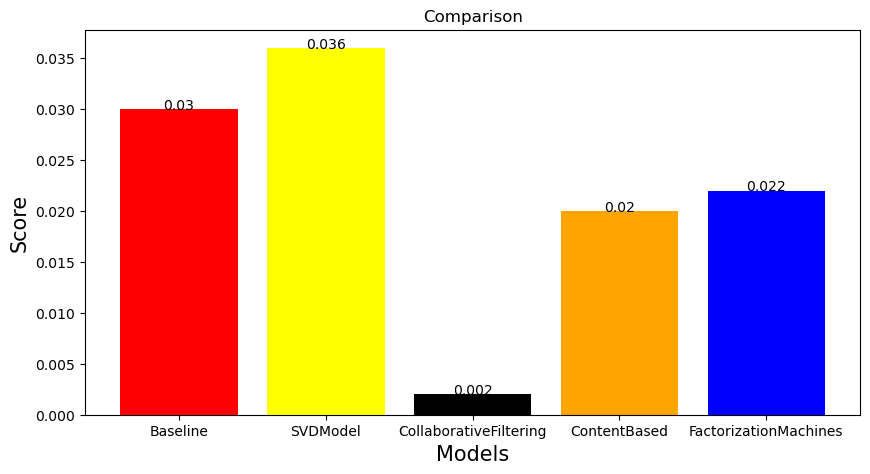

In [19]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
# creating data on which bar chart will be plot
x = ['Baseline', "SVDModel",  "CollaborativeFiltering", 
     "ContentBased", "FactorizationMachines"]

y = list(global_metrics_df["Score"])
     
# setting figure size by using figure() function
plt.figure(figsize = (10, 5))

c = ['red', 'yellow', 'black', 'orange', "blue"]
# making the bar chart on the data
plt.bar(x, y, color =c)
     
# calling the function to add value labels
addlabels(x, y)
     
# giving title to the plot
plt.title("Comparison")
     
# giving X and Y labels
plt.xlabel("Models", fontsize=15)
plt.ylabel("Score", fontsize=15)

plt.savefig('comparison_models_plot.png')
plt.show()